In [136]:

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pylab as plt
import seaborn as sns
# from wordcloud import WordCloud
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 15})

# Text Pre-processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from afinn import Afinn
from collections import Counter

# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Model Validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

#Model Building
from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Model Accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report

# To save & load models
from pickle import dump
from pickle import load

#Warnings
import warnings
warnings.filterwarnings("ignore")

In [166]:
# Custom Function to divide the rating into two class problem (howevere it is is primitive technique)
def map_sentiment(rating):
    if rating <= 2:
        return 0
    else:
        return 1

In [167]:
# loading the extracted dataset
df = pd.read_csv("Tripadvisor_Grand_Hyatt_Review.csv")

# Droping duplicate index column
df = df.iloc[:, 1:]

# concatination of Review title + Review, +str(' ') to add space in between the both
df['Review_Combined'] = df['Review_Title'] + str(' ') + df['Review']

# sentiment maped into 2 class 1=Positive reviews 0=Negtaive reviews
df['Sentiment'] = [map_sentiment(x) for x in df['Rating']]
df.head()

,Customer_name,Rating,Review_Title,Review,Review_Combined,Sentiment
0,maneshpreet26,5,Unforgettable experience..amazing staycation e...,We visited Grand Hyatt on the occasion of my s...,Unforgettable experience..amazing staycation e...,1
1,Majnu gosavi,5,All about in love with grand Hyatt hotel,तुम्हारी क्या तारीफ करू तुम्ह ही तो तारीफ हो ...,All about in love with grand Hyatt hotel तुम्ह...,1
2,Akash Bhosale,5,Most Knowledgeable Trainer,I was fascinated by the Diet and Exercise know...,Most Knowledgeable Trainer I was fascinated by...,1
3,Mahek Dugar,5,A night stay at Grand Hyatt Mumbai,"absolutely loved the stay. amazing food, ambie...",A night stay at Grand Hyatt Mumbai absolutely ...,1
4,Jaslin,4,Staycation,I had booked Grand Hyatt Santacruz for Staycat...,Staycation I had booked Grand Hyatt Santacruz ...,1


In [168]:
df.drop(1,inplace=True)

In [169]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
stlist = ['no','not','nor','don',"don't","aren","aren't","couldn","couldn't","didn",
          "didn't","doesn","doesn't","hadn","hadn't","hasn","hasn't","haven","havem't","isn",
          "isn't","mightn","mightn't","mustn","mustn't","needn","needn't","shan","shan't","shouldn",
          "shouldn't","wasn","wasn't","weren","weren't","won","won't","wouldn","wouldn't"]
all_stopwords= [ele for ele in all_stopwords if all(ch not in ele for ch in stlist)]
# all_stopwords.remove(temp)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
corpus=[]

for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i,3])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [171]:
corpus

['visit grand hyatt occas sister birthday right moment enter hotel staff made sure occas get well celebr recept team sent amaz cake beauti birthday card room later club much fun drink food everyth top notch entir hotel club team friendli effici special appreci zaki carolyn front recept team made sure overal stay comfort also want appreci ashish team club made even memor us also want appreci agnel staff fifti five east restaur made love dish sister make birthday even',
 'fascin diet exercis knowledg sachin sir share absolut knowledg perfect trainer everyon want gym cheer fit enthusiast sachin surv sir keep everyon healthi fit',
 'absolut love stay amaz food ambienc staff hospit got special dish chef nishad team friend birthday fantast breakfast extraordinari huge huge thank nice help peopl make stay memor',
 'book grand hyatt santacruz staycat friend birthday overal experi good food servic hotel good due covid restrict mani place shut could not explor one opt chill time famili friend',


In [172]:
df['Cleaned_Review'] = corpus
df.head()

,Customer_name,Rating,Review_Title,Review,Review_Combined,Sentiment,Cleaned_Review
0,maneshpreet26,5,Unforgettable experience..amazing staycation e...,We visited Grand Hyatt on the occasion of my s...,Unforgettable experience..amazing staycation e...,1,visit grand hyatt occas sister birthday right ...
2,Akash Bhosale,5,Most Knowledgeable Trainer,I was fascinated by the Diet and Exercise know...,Most Knowledgeable Trainer I was fascinated by...,1,fascin diet exercis knowledg sachin sir share ...
3,Mahek Dugar,5,A night stay at Grand Hyatt Mumbai,"absolutely loved the stay. amazing food, ambie...",A night stay at Grand Hyatt Mumbai absolutely ...,1,absolut love stay amaz food ambienc staff hosp...
4,Jaslin,4,Staycation,I had booked Grand Hyatt Santacruz for Staycat...,Staycation I had booked Grand Hyatt Santacruz ...,1,book grand hyatt santacruz staycat friend birt...
5,ashishindani,4,Small Staycation for break from routine schedule,I found the Grand Hyatt as one of the best pla...,Small Staycation for break from routine schedu...,1,found grand hyatt one best place stay citi des...


In [173]:
# Finding total words in cleaned review
clean_review_words = " ".join(df['Cleaned_Review'])
clean_review_words = clean_review_words.split()

# total number of words present in cleaned reviews
print(len(clean_review_words))
print(clean_review_words)

200393
['visit', 'grand', 'hyatt', 'occas', 'sister', 'birthday', 'right', 'moment', 'enter', 'hotel', 'staff', 'made', 'sure', 'occas', 'get', 'well', 'celebr', 'recept', 'team', 'sent', 'amaz', 'cake', 'beauti', 'birthday', 'card', 'room', 'later', 'club', 'much', 'fun', 'drink', 'food', 'everyth', 'top', 'notch', 'entir', 'hotel', 'club', 'team', 'friendli', 'effici', 'special', 'appreci', 'zaki', 'carolyn', 'front', 'recept', 'team', 'made', 'sure', 'overal', 'stay', 'comfort', 'also', 'want', 'appreci', 'ashish', 'team', 'club', 'made', 'even', 'memor', 'us', 'also', 'want', 'appreci', 'agnel', 'staff', 'fifti', 'five', 'east', 'restaur', 'made', 'love', 'dish', 'sister', 'make', 'birthday', 'even', 'fascin', 'diet', 'exercis', 'knowledg', 'sachin', 'sir', 'share', 'absolut', 'knowledg', 'perfect', 'trainer', 'everyon', 'want', 'gym', 'cheer', 'fit', 'enthusiast', 'sachin', 'surv', 'sir', 'keep', 'everyon', 'healthi', 'fit', 'absolut', 'love', 'stay', 'amaz', 'food', 'ambienc', 's

<AxesSubplot:xlabel='Word_count_clean_review', ylabel='Count'>

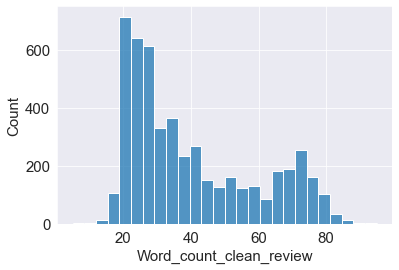

In [174]:
# Number of words in the cleaned Review
df['Word_count_clean_review'] = pd.Series(
    [len(item.split()) for item in df['Cleaned_Review']])
df.head()
# most of the cleaned review have 20 to 40 words
sns.histplot(df['Word_count_clean_review'])

In [175]:
# finding frequency of all words
all_words = len(clean_review_words)
print('Total words in clean review is {}'.format(all_words))

word_dist = nltk.FreqDist(clean_review_words)

# Creating dataframe for word frequency
freq_data_all = pd.DataFrame(word_dist.most_common(all_words),
                             columns=['Word', 'Frequency'])

# Percentage of word frequency
freq_data_all['percentFreq_all'] = (freq_data_all.Frequency /
                                    freq_data_all.Frequency.sum()) * 100

print('No of unique words {}'.format(len(freq_data_all)))
print(freq_data_all[0:10])

Total words in clean review is 200393
No of unique words 8496
     Word  Frequency  percentFreq_all
0   hotel       4995         2.492602
1    room       3990         1.991088
2    stay       3761         1.876812
3   staff       3073         1.533487
4    good       2930         1.462127
5  servic       2466         1.230582
6   hyatt       2436         1.215611
7    food       2135         1.065406
8   grand       2026         1.011013
9   great       1994         0.995045


In [176]:
# from textblob import TextBlob
# def getSubjectivity(review):
#     return TextBlob(review).sentiment.subjectivity

# # function to calculate polarity
# def getPolarity(review):
#     return TextBlob(review).sentiment.polarity

# # function to analyze the reviews
# def analysis(score):
#     if score < 0:
#         return '0'
#     # elif score == 0:
#     #     return '0'
#     else:
#         return '1'

In [177]:
df.head()

,Customer_name,Rating,Review_Title,Review,Review_Combined,Sentiment,Cleaned_Review,Word_count_clean_review
0,maneshpreet26,5,Unforgettable experience..amazing staycation e...,We visited Grand Hyatt on the occasion of my s...,Unforgettable experience..amazing staycation e...,1,visit grand hyatt occas sister birthday right ...,79.0
2,Akash Bhosale,5,Most Knowledgeable Trainer,I was fascinated by the Diet and Exercise know...,Most Knowledgeable Trainer I was fascinated by...,1,fascin diet exercis knowledg sachin sir share ...,28.0
3,Mahek Dugar,5,A night stay at Grand Hyatt Mumbai,"absolutely loved the stay. amazing food, ambie...",A night stay at Grand Hyatt Mumbai absolutely ...,1,absolut love stay amaz food ambienc staff hosp...,29.0
4,Jaslin,4,Staycation,I had booked Grand Hyatt Santacruz for Staycat...,Staycation I had booked Grand Hyatt Santacruz ...,1,book grand hyatt santacruz staycat friend birt...,38.0
5,ashishindani,4,Small Staycation for break from routine schedule,I found the Grand Hyatt as one of the best pla...,Small Staycation for break from routine schedu...,1,found grand hyatt one best place stay citi des...,74.0


In [178]:
# df["textblob_sentiment"]=df["Cleaned_Review"].apply(getPolarity)
# df["textblob_analysis"]=df["textblob_sentiment"].apply(analysis)

In [179]:
df.head()

,Customer_name,Rating,Review_Title,Review,Review_Combined,Sentiment,Cleaned_Review,Word_count_clean_review
0,maneshpreet26,5,Unforgettable experience..amazing staycation e...,We visited Grand Hyatt on the occasion of my s...,Unforgettable experience..amazing staycation e...,1,visit grand hyatt occas sister birthday right ...,79.0
2,Akash Bhosale,5,Most Knowledgeable Trainer,I was fascinated by the Diet and Exercise know...,Most Knowledgeable Trainer I was fascinated by...,1,fascin diet exercis knowledg sachin sir share ...,28.0
3,Mahek Dugar,5,A night stay at Grand Hyatt Mumbai,"absolutely loved the stay. amazing food, ambie...",A night stay at Grand Hyatt Mumbai absolutely ...,1,absolut love stay amaz food ambienc staff hosp...,29.0
4,Jaslin,4,Staycation,I had booked Grand Hyatt Santacruz for Staycat...,Staycation I had booked Grand Hyatt Santacruz ...,1,book grand hyatt santacruz staycat friend birt...,38.0
5,ashishindani,4,Small Staycation for break from routine schedule,I found the Grand Hyatt as one of the best pla...,Small Staycation for break from routine schedu...,1,found grand hyatt one best place stay citi des...,74.0


In [181]:
afn=Afinn()
# Affin Sentiment Score
score = [afn.score(item) for item in df['Cleaned_Review']]

# Positive review = 1
# Negative review = 0

# Affin Sentiment Making it a two class classification problem
Affin_sentiment = [1 if score > 0 else 0 for score in score]

                    

In [182]:
# Affin Sentiment & Score added to the data frame
df['Affin_score'] = score
df['Affin_sentiment'] = Affin_sentiment
# df.head(10)

dict_items([(1, 4638), (0, 361)])
Class: 1, Number: 4638, Percentage 92.76
Class: 0, Number: 361, Percentage 7.22


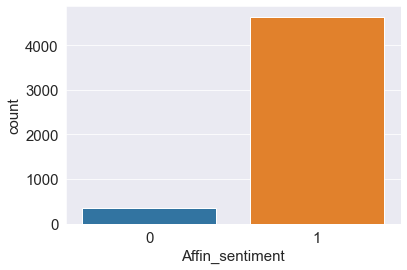

In [185]:
sns.countplot(df['Affin_sentiment'])
counter = Counter(df['Affin_sentiment'])
counter.items()
print(counter.items())
# Percentage of Data as per Affin Sentiment, Huge diffrence in the two classes..!!
for k, v in counter.items():
    per = v / 5000 * 100
    print("Class: {}, Number: {}, Percentage {}".format(
        k, v, np.round(per, 2)))

In [186]:
cv2 = CountVectorizer(stop_words=all_stopwords,ngram_range=(1,2))
cv2_x = cv2.fit_transform(corpus)
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(cv2_x)

# get feature names
feature_names = cv2.get_feature_names()

# fetch document for which keywords needs to be extracted
doc = corpus[532]

# generate tf-idf for the given document
tf_idf_vector = tfidf_transformer.transform(cv2.transform([doc]))

In [187]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
thank much nishad messag happi report stay hyatt comfort last occas not dine breakfast usual vari select definit say courteou attent servic staff noteworthi prior visit year food celini simpli benessimo thank look forward next stay pleas rememb send photo team shall sure share famili

Keywords:
vari select 0.141
usual vari 0.141
team shall 0.141
sure share 0.141
staff noteworthi 0.141
simpli benessimo 0.141
share famili 0.141
send photo 0.141
select definit 0.141
say courteou 0.141


In [188]:
tfidf2 = TfidfVectorizer(norm="l2",analyzer='word', stop_words=all_stopwords,ngram_range=(1,3))
tfidf2_x = tfidf2.fit_transform(corpus)
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(tfidf2_x)

# get feature names
feature_names = tfidf2.get_feature_names()

# fetch document for which keywords needs to be extracted
doc = corpus[532]

# generate tf-idf for the given document
tf_idf_vector = tfidf_transformer.transform(tfidf2.transform([doc]))


In [189]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
thank much nishad messag happi report stay hyatt comfort last occas not dine breakfast usual vari select definit say courteou attent servic staff noteworthi prior visit year food celini simpli benessimo thank look forward next stay pleas rememb send photo team shall sure share famili

Keywords:
year food celini 0.111
visit year food 0.111
vari select definit 0.111
vari select 0.111
usual vari select 0.111
usual vari 0.111
team shall sure 0.111
team shall 0.111
sure share famili 0.111
sure share 0.111


In [190]:
import joblib
tfidf = TfidfVectorizer(max_features=3000,
                       ngram_range=(1,3))
# TFIDF for X-train
corpus_tfidf= tfidf.fit_transform(corpus)
X = corpus_tfidf.toarray()
y= df['Affin_sentiment']
# save the model to disk
# filename = 'model_URV.sav'
# dump(tfidf, open('model_URV.sav', 'wb'))
joblib.dump(tfidf, "cv_4.pkl")


['cv_4.pkl']

In [191]:
# tb_counts = df.textblob_analysis.value_counts()
# tb_counts

In [192]:
# the minority class will over sampled by 80%
# stregegy = {'1':4648,'-1':4000,'0':1000}
stregegy=0.8
# initializing of SMOTEN Sampling
over = SMOTE(sampling_strategy= stregegy,random_state=7)

In [193]:
# Over Samplled X and Y variable 
X_over, y_over = over.fit_resample(X, y)

In [194]:
# from imblearn.pipeline import make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss

In [195]:
# count_class_0 = 4900
# count_class_1 = 4900
# count_class_2 = 4900
# pipe = make_pipeline(
#     SMOTE(sampling_strategy={0: count_class_0},sampling_strategy={-1: count_class_2}),
#     NearMiss(sampling_strategy={1: count_class_1}))

In [196]:
# X_smt, y_smt = pipe.fit_resample(X, y)

In [197]:
X_train,X_test,y_train,y_test=train_test_split(X_over, y_over,random_state=7,test_size=0.20,stratify=y_over)

In [198]:
print("X_train = {}".format(X_train.shape))
print("X_test = {}".format(X_test.shape))
print("y_train = {}".format(y_train.shape))
print("y_test = {}".format(y_test.shape))

X_train = (6678, 3000)
X_test = (1670, 3000)
y_train = (6678,)
y_test = (1670,)


In [199]:
# custom Fuction to run the model with confusion matrix + Train and test accuracy + F1score
def model_metric(X_train, X_test, y_train, y_test, model, name):

    # predicted for X_train and X_test
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    # Accuracy
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)

    # F1score
    f1_score = metrics.f1_score(y_train, predict_train)
   
    print('Accuracy for Train set {}'.format(accuracy_train))
    print('Accuracy for Test set {}'.format(accuracy_test))
    print('Fi Score {}'.format(f1_score))
    
    print(classification_report(y_test, predict_test))

    plot_confusion_matrix(estimator=model,
                          X=X_test,
                          y_true=y_test,
                          cmap='Blues')
    plt.grid(False)
    plt.title('{} - Confusion Matrix on Test set'.format(name))

In [200]:
# model_naive = MultinomialNB()
# model_naive.fit(X_train, y_train)

# #Results
# model_metric(X_train, X_test, y_train, y_test, model_naive, "Naive Bayes")
# joblib.dump(model_naive, "model_5.pkl")

Accuracy for Train set 0.9794848757112908
Accuracy for Test set 0.9706586826347305
Fi Score 0.9812354471990139
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       742
           1       1.00      0.95      0.97       928

    accuracy                           0.97      1670
   macro avg       0.97      0.97      0.97      1670
weighted avg       0.97      0.97      0.97      1670



['model_4.pkl']

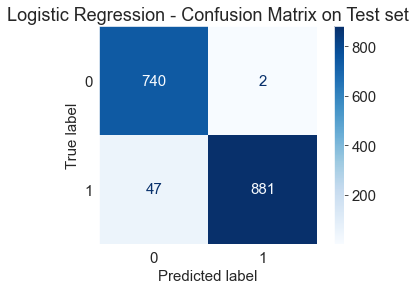

In [201]:
model_lr= LogisticRegression()
model_lr.fit(X_train, y_train)
model_metric(X_train, X_test, y_train, y_test, model_lr,
                'Logistic Regression')
# #Results
# model_metric(X_train, X_test, y_train, y_test, model_naive, "Naive Bayes")C=5, penalty='l2', random_state=7

# Creating a pickle file for the Multinomial Naive Bayes model
joblib.dump(model_lr, "model_4.pkl")